### 数据的欠拟合和过拟合
为 PolynomialFeatures 传入不同的  degree 会产生不同的多项式函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

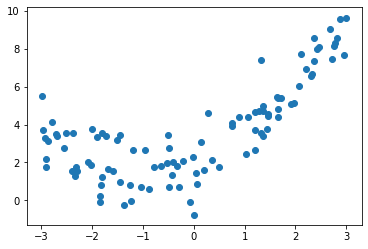

In [2]:
# 生成数据并显示
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

### 传入不同的 degree  将数据进行拟合

In [3]:
# 将 pipline 封装成一个函数,出入不同的 degree 对数据进行拟合
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [4]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [5]:
# 1.线性回归进行拟合
poly_reg = PolynomialRegression(degree=1)
poly_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [6]:
y_predict = poly_reg.predict(X)
# 这里用均方误差 MSE 来测量数据的误差
mean_squared_error(y, y_predict)

3.0750025765636577

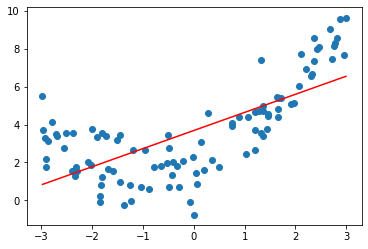

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

In [8]:
# 2. degree = 2
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)
y2_predict = poly2_reg.predict(X)
# 这里用均方误差 MSE 来测量数据的误差,degree = 2 时，很明显误差更小了
mean_squared_error(y, y2_predict)

1.0987392142417856

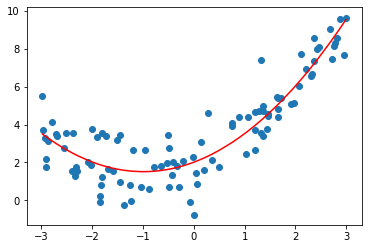

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')

In [10]:
# 3.degree = 3
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
# 很显然误差更小了
mean_squared_error(y, y10_predict)

1.050846676376417

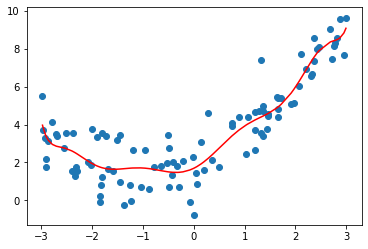

In [11]:
# 在这里显示的曲线更加的敏感
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')

In [12]:
# degree = 100
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6880004678712686

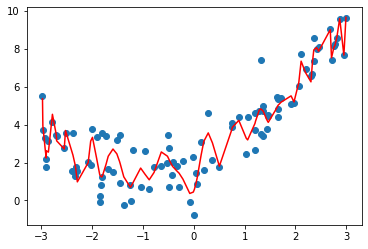

In [13]:
# 很明显，这里的线更加的敏感了
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')

In [14]:
#4.重新创建数据，让其过度拟合
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

[-3, 3, 0, 10]

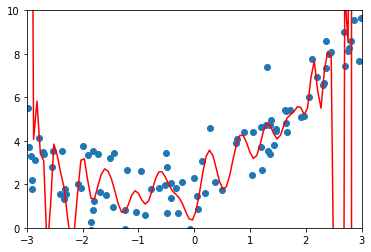

In [15]:
plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
# 在这里要将图像的横纵坐标进行限制，因为degree = 100 的时候，生成的 100次方的数的大小，太大了，所以要将数据拉回来一点
plt.axis([-3, 3, 0, 10])

### 使用测试集判断拟合程度
使用训练数据先将数据进行拟合，然后用测试数据判断拟合的效果

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [19]:
# degree=1.并检测均方差值
poly_reg.fit(X_train, y_train)
y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [20]:
# degree = 2,性能较好
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.80356410562979

In [21]:
# degree = 10
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150768

In [ ]:
# degree = 100，拟合的误差非常大
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)